## Задача
На электростанции есть две одинаковые и независимые турбины. У каждой из них время до поломки подчиняется экспоненциальному распределению c известным параметром Tau, время до починки от момента поломки также экспоненциально распределено с известным параметром m. Известно, что в момент времени t=0 обе турбины работали исправно, какова вероятность, что хотя бы одна турбина будет исправна в момент времени T?


### Решение:

#### Теория

Рассмотрим сначала случай, когда система состоит из одной турбины.
В произвольный момент времени турбина может находиться в одном из двух состояний:

$ S_0 $ — состояние работоспособности;

$ S_1 $ — состояние восстановления.

Пусть $ P_0(t) $ — вероятность нахождения системы в состоянии $ S_0 $, а $ P_1(t) $ — вероятность нахождения системы в состоянии $ S_1 $. 

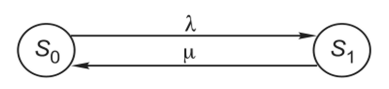

Составим систему дифференциальных уравнений Колмогорова: 
$$
\left\{
    \begin{array}\\
        \frac{dP_0(t)}{dt} = -λP_0(t) + μP_1(t) \\
        \frac{dP_1(t)}{dt} = -λP_1(t) + μP_1(t) \\
    \end{array}
\right.
$$
<br>
В начальный момент времени (t=0) система находилась в работоспособном состоянии, т.е. $P_0(0) = 1 $ и $P_1(0) = 0 $.<br>
<br>
Поскольку $Р_0(t) + Р_x(t) = 1$, то отбросим второе урванение, а в первое подставим $Р_x(t) = 1 - Р_0(t) :$
$$
\frac{dP_0(t)}{dt} = -λP_0(t) + μ(1 - Р_0(t)) = - (λ+μ)P_0(t)+μ
$$

<br>
Прологарифмируем последнее выражение, чтобы найти решение уравнения:
$$
P_0(t) = e^{-(λ+μ)t}P_0(t) + \int_{0}^t e^{-(λ+μ)(t-τ)}μdτ=\\
= e^{-(λ+μ)t} + μe^{-(λ+μ)t} + \int_{0}^t e^{-(λ+μ)τ}dτ=\\
= e^{-(λ+μ)t} + μe^{-(λ+μ)t} \frac{1}{λ+μ}e^{(λ+μ)τ}\bigg|_0^t=\\
= e^{-(λ+μ)t} + μe^{-(λ+μ)t} \left[
  \begin{array}{ccc}
     \frac {1}{λ+μ}e^{(λ+μ)t}-\frac {1}{λ+μ} \\
  \end{array}
\right]=\\
= \frac {μ}{λ+μ}+\frac {λ}{λ+μ}e^{-(λ+μ)t}
$$
<br>
Учитывая, что $ Р_0(t) + Р_x(t) = 1 $ получаем вероятность простоя одной турбины:
$$
P_1(t) = 1 -  \bigg(\frac {μ}{λ+μ}+\frac {λ}{λ+μ}e^{-(λ+μ)t}\bigg)
$$
<br>
Поскольку турбины независимы, то вероятность работы хоть одной турбины будет определяться как:
<br>
$$P_{общ}=(P_1+P_2) - (P_1*P_2)$$
<br>
Поскольку турбины одинаковы, то имеем:
<br>
$$P_{общ}=2P_1 - P_1^2\\
P_{общ}=P_1(2-P_1)$$<br>
Подставив формулу вероятности рабочего состояния одной трубины получим итоговую формулу:<br>
$$
P_0общ(t) = \bigg( \frac {μ}{λ+μ}+\frac {λ}{λ+μ}e^{-(λ+μ)t}\bigg) * \bigg(2 - \frac {μ}{λ+μ}-\frac {λ}{λ+μ}e^{-(λ+μ)t}\bigg)
$$

#### Пример

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Временной диапозон
x = np.linspace(0, 150,100)

In [ ]:
# Коэффициенты экспоненциальных распределений:
# Tau = h1
# m = m1

h1=0.05
m1=0.03

In [ ]:
#Вероятность рабочего состояния одной турбины:
p1 = (m1/(h1+m1) + (h1/(m1+h1))*np.exp(-x*(h1+m1)))
#--//-- хоть одной турбины
total = p1*(2-p1)

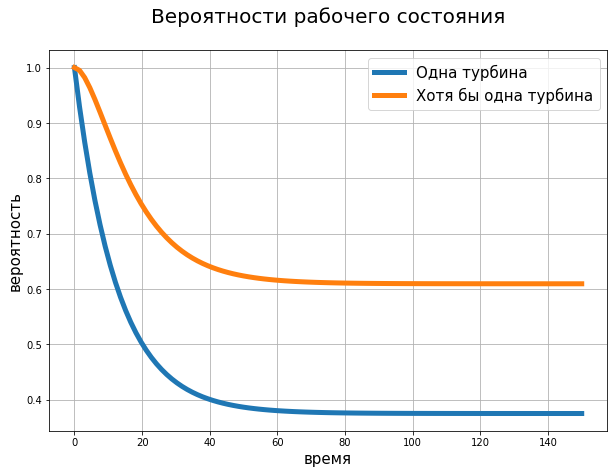

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(x, p1, linewidth = 5, label="Одна турбина")
plt.plot(x, total, linewidth = 5, label="Хотя бы одна турбина")
plt.legend(fontsize=15)
plt.title("Вероятности рабочего состояния\n", fontsize=20)
plt.xlabel("время", fontsize=15)
plt.ylabel("вероятность", fontsize=15)
plt.grid()